In [1]:
#importing relevant libraries
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn import tree   
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

In [2]:
#1. Read your Titanic dataset as usual: Create a training set and a testing set then apply decision tree

##Importing our dataset from csv file

dataset=pd.read_csv("titanic-passengers.csv", sep=";")

##Preprocessing our data
def preprocess_data(new_data):
    new_data['Age'].fillna(new_data['Age'].mean(),inplace=True)
    new_data.replace({'Sex':{'male': 1,'female':0}},inplace=True)
    new_data['Cabin']=new_data.Cabin.fillna('G6')
    new_data.replace({'Survived':{'Yes': 1,'No':0}},inplace=True)
    return new_data
data=preprocess_data(dataset)
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,0,2,"Collander, Mr. Erik Gustaf",1,28.000000,0,0,248740,13.0000,G6,S
1,76,0,3,"Moen, Mr. Sigurd Hansen",1,25.000000,0,0,348123,7.6500,F G73,S
2,641,0,3,"Jensen, Mr. Hans Peder",1,20.000000,0,0,350050,7.8542,G6,S
3,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",0,29.000000,0,4,349909,21.0750,G6,S
4,672,0,1,"Davidson, Mr. Thornton",1,31.000000,1,0,F.C. 12750,52.0000,B71,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,14.000000,1,0,237736,30.0708,G6,C
887,61,0,3,"Sirayanian, Mr. Orsen",1,22.000000,0,0,2669,7.2292,G6,C
888,535,0,3,"Cacic, Miss. Marija",0,30.000000,0,0,315084,8.6625,G6,S
889,102,0,3,"Petroff, Mr. Pastcho (""Pentcho"")",1,29.699118,0,0,349215,7.8958,G6,S


In [3]:
##features extraction
x=data.drop(["Survived", "Name", "Cabin", "Ticket", "Embarked"], axis=1)
y= data["Survived"]

##splitting data
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.20,random_state=10)

##applying tree algorithm
tree1 = tree.DecisionTreeClassifier()  
tree1.fit(x_train, y_train)   #fitting our model
y_pred=tree1.predict(x_test)   # evaluating our model
print("score:{}".format(accuracy_score(y_test, y_pred)))

score:0.7988826815642458


In [4]:
#2. Plot your decision tree and try to read the tree branches and conclude a prediction manually.
plt.figure(figsize=(30,25))
plot_tree(tree, filled=True)
plt.show()


InvalidParameterError: The 'decision_tree' parameter of plot_tree must be an instance of 'sklearn.tree._classes.DecisionTreeClassifier' or an instance of 'sklearn.tree._classes.DecisionTreeRegressor'. Got <module 'sklearn.tree' from 'C:\\Users\\maman\\anaconda3\\Lib\\site-packages\\sklearn\\tree\\__init__.py'> instead.

<Figure size 3000x2500 with 0 Axes>

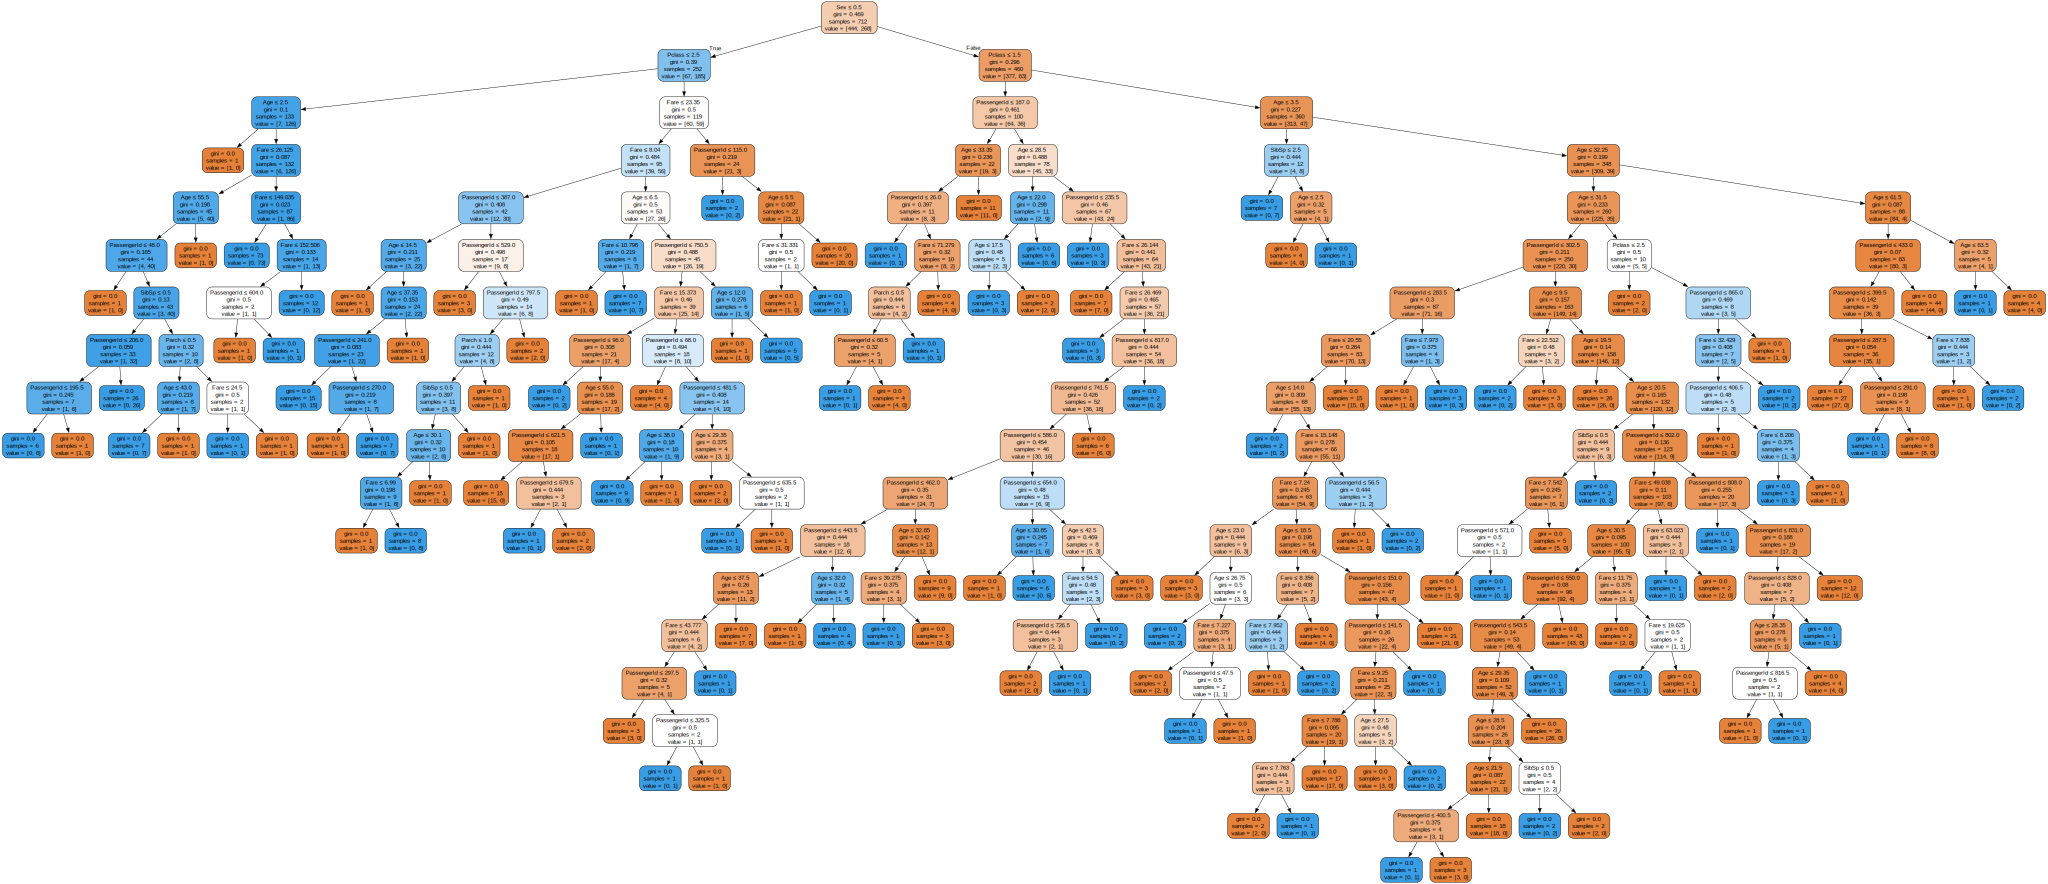

In [5]:
from sklearn import tree
from graphviz import Source

dot_data = tree.export_graphviz(tree1, out_file=None,feature_names=x_train.columns,filled=True,rounded=True,special_characters=True)  

graph = Source(dot_data)  
graph

In [6]:
#3. Change the decision tree parameters(at least two parameters). 
tree2 = DecisionTreeClassifier(max_depth=3, min_samples_leaf=2)
tree2.fit(x_train, y_train)


DecisionTreeClassifier(max_depth=3, min_samples_leaf=2)

In [7]:
#4. Calculate the new accuracy and compare it with the previous results. 
y_pred2=tree2.predict(x_test)   # evaluating our model
print("score:{}".format(accuracy_score(y_test, y_pred2)))

score:0.8044692737430168


In [8]:
'''
A Decision Tree Classifier with a maximum depth of 3 and a minimum samples leaf of 2 improves the accuracy to 0.80. 
This shows that changing the parameters of the model can lead to better performance.
'''

'\nA Decision Tree Classifier with a maximum depth of 3 and a minimum samples leaf of 2 improves the accuracy to 0.80. \nThis shows that changing the parameters of the model can lead to better performance.\n'

In [9]:
#5. Use a random forest 
forest = RandomForestClassifier(n_estimators=100)
forest.fit(x_train, y_train)
y_pred3=forest.predict(x_test)   # evaluating our model
print("score:{}".format(accuracy_score(y_test, y_pred3)))

score:0.8547486033519553


In [10]:
'''
The Random Forest Classifier with 100 estimators has an accuracy score of 0.846. 
This is a significant improvement over the single decision tree.
'''

'\nThe Random Forest Classifier with 100 estimators has an accuracy score of 0.846. \nThis is a significant improvement over the single decision tree.\n'

In [11]:
#then change the number of estimators.
forest2 = RandomForestClassifier(n_estimators=500)
forest2.fit(x_train, y_train)


RandomForestClassifier(n_estimators=500)

In [12]:
#6. Calculate the new accuracy and compare it with the previous result.
y_pred4=forest2.predict(x_test)   # evaluating our model
print("score:{}".format(accuracy_score(y_test, y_pred4)))

score:0.8491620111731844


In [13]:
'''
Increasing the number of estimators in the Random Forest Classifier to 500 further improves the accuracy to 0.8547. 
This suggests that adding more trees to the forest can lead to better performance
'''

'\nIncreasing the number of estimators in the Random Forest Classifier to 500 further improves the accuracy to 0.8547. \nThis suggests that adding more trees to the forest can lead to better performance\n'